## Importing libraries and Loading files

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc, average_precision_score

In [2]:
churn = pd.read_csv('/Users/kmalathkar/workspace/projects/machine-learning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Preprocessing

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.shape

(7043, 21)

In [6]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
churn.duplicated().sum()

np.int64(0)

In [8]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Converting the object type to float type of TotalCharges

In [10]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
print(churn['TotalCharges'].isnull().sum())


11


In [11]:
churn.dropna(inplace=True)

In [12]:
churn['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

The dataset is moderately imbalanced, so accuracy alone is misleading. Prefer ROC-AUC, precision, and recall as model metrics.

In [13]:
churn.describe(include=['object', 'bool']).T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [26]:
churn = churn.drop(['customerID'], axis=1)

## Exploratory Data Analysis

In [27]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]


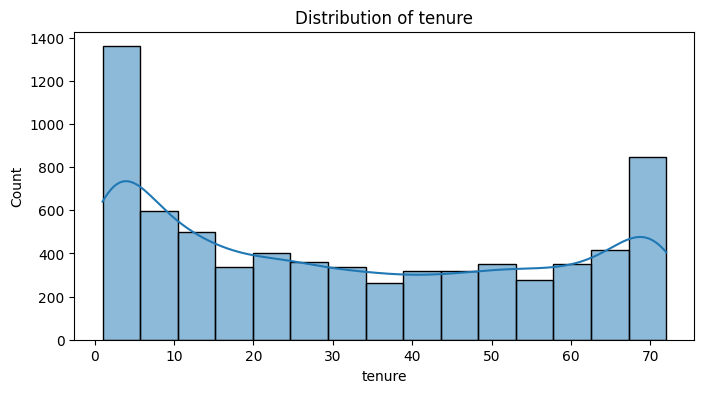

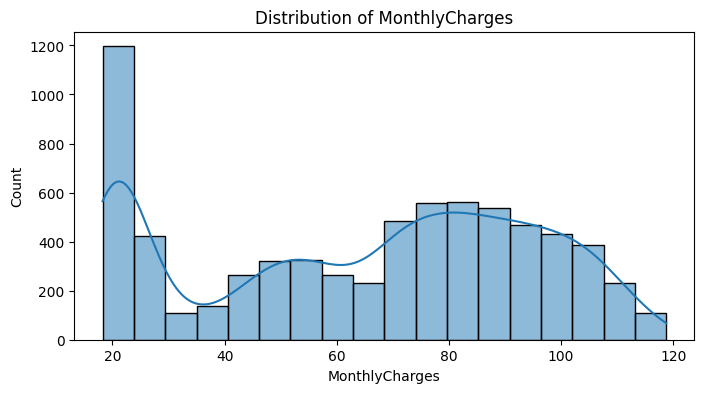

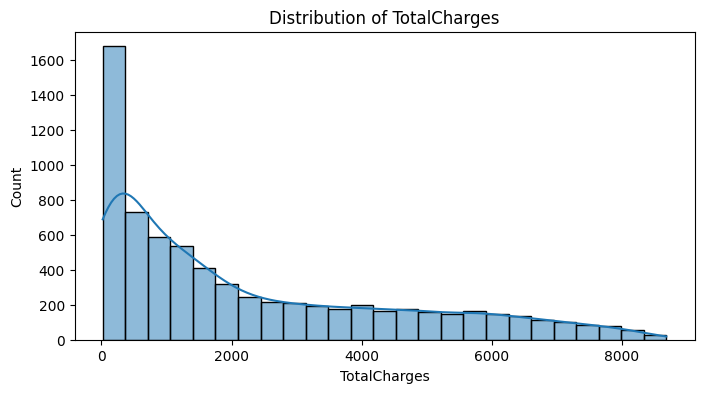

In [28]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(churn[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

* tenure → heavy skew
* MonthlyCharges → bimodal
* TotalCharges → right-skewed

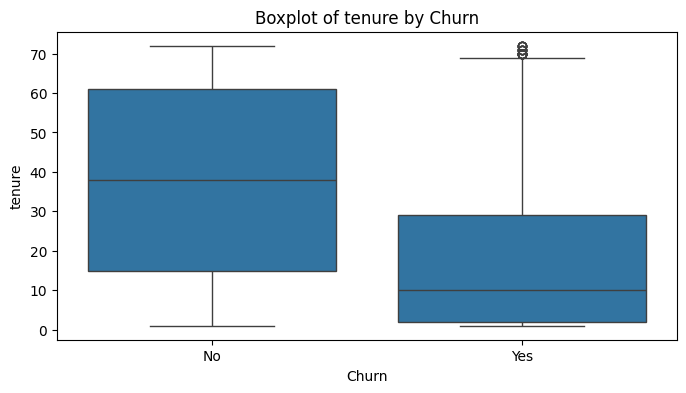

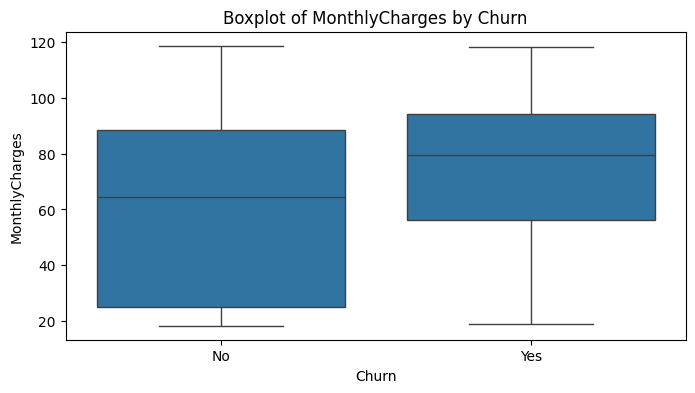

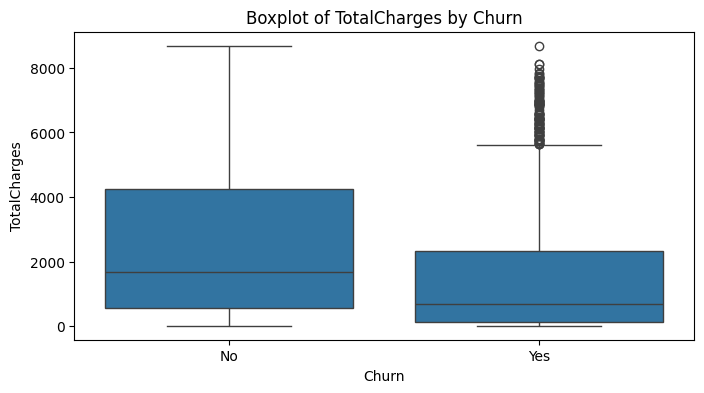

In [29]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=churn)
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()

Churned customers:

* Lower tenure
* Higher monthly charges
* Lower total charges (short lifetime)

In [30]:
cat_cols = churn.select_dtypes(include=['object']).columns.tolist()

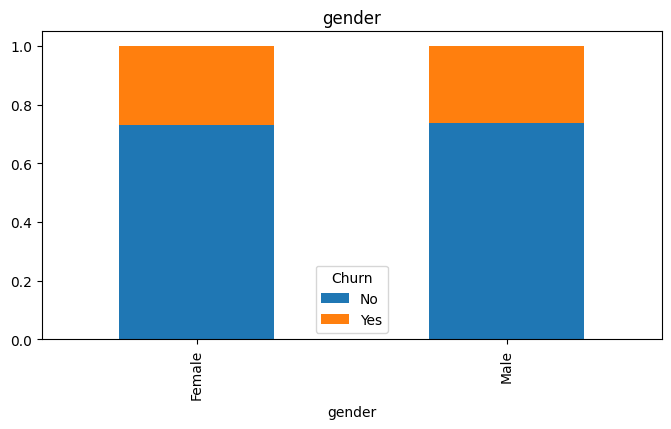

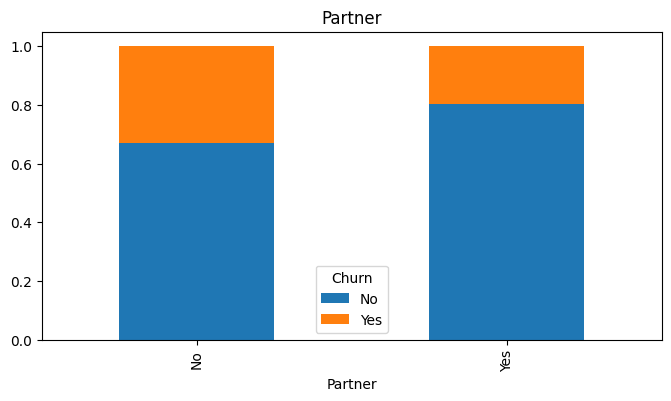

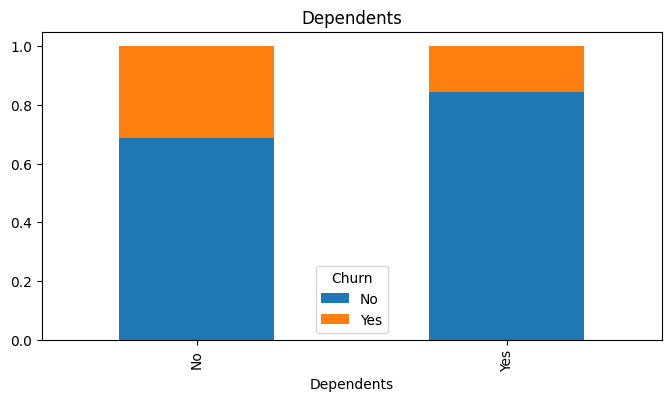

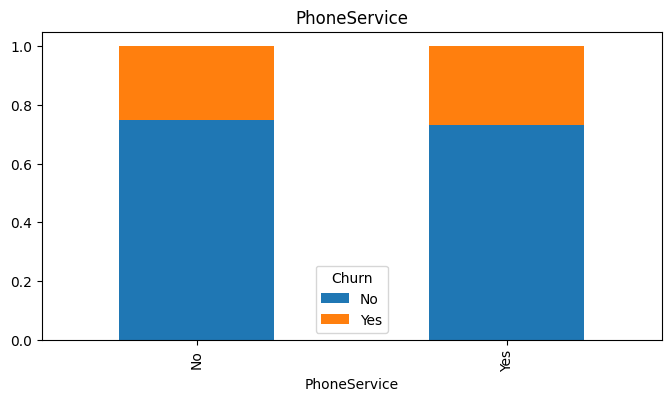

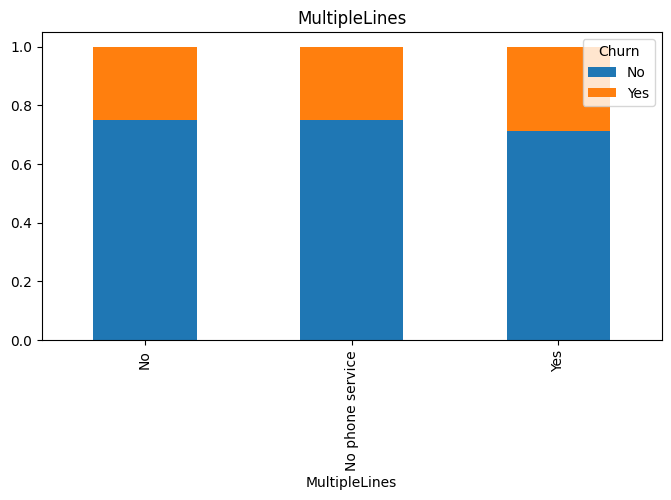

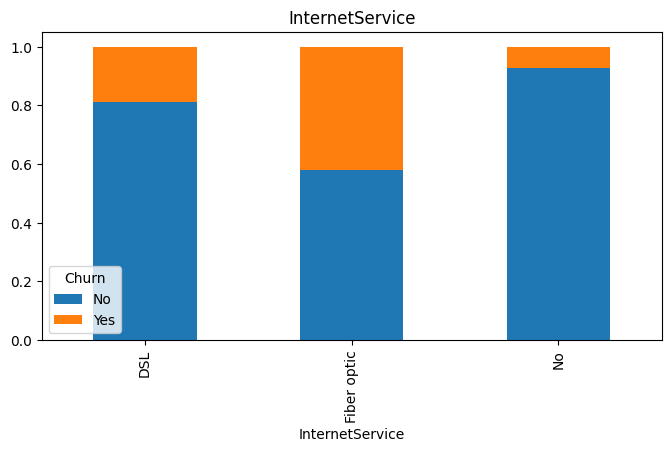

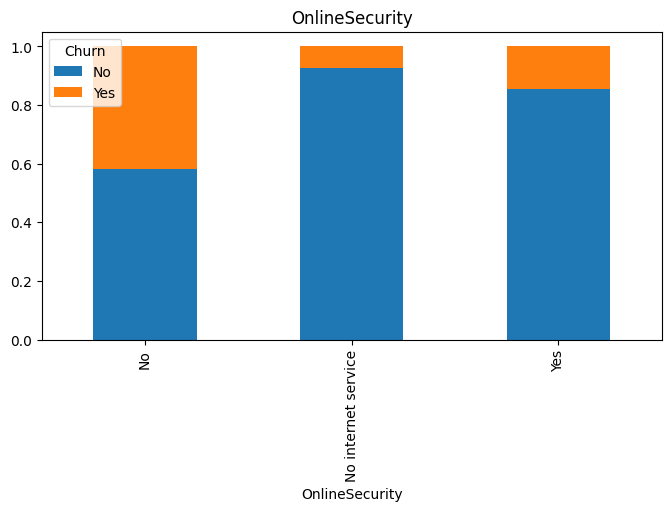

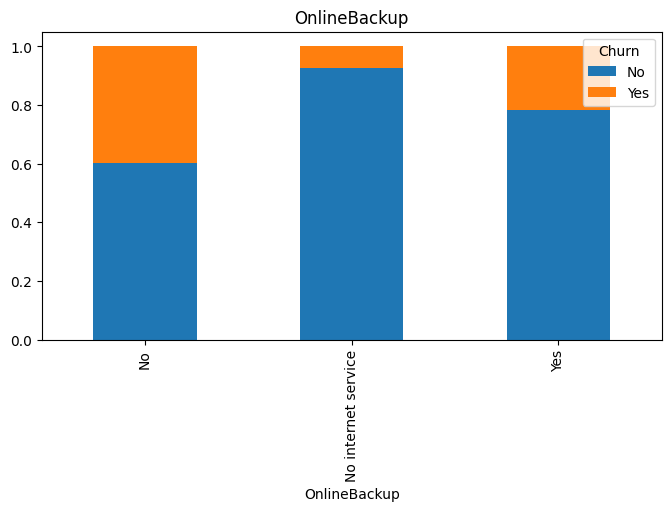

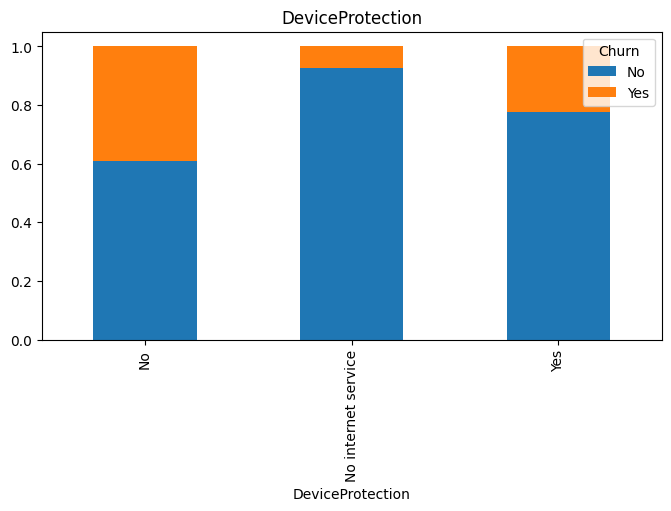

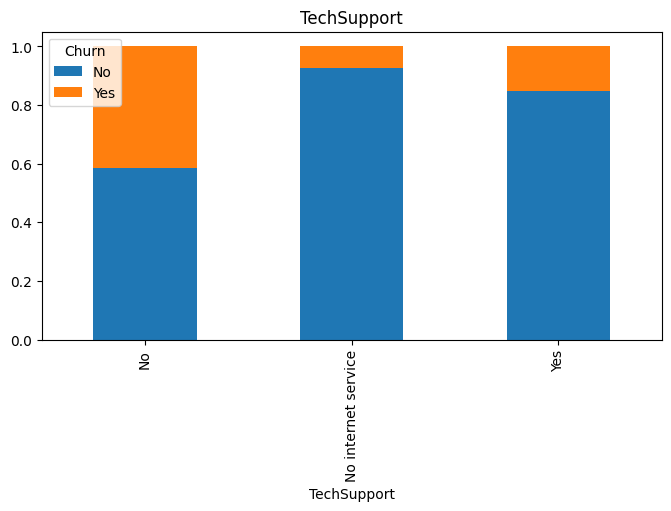

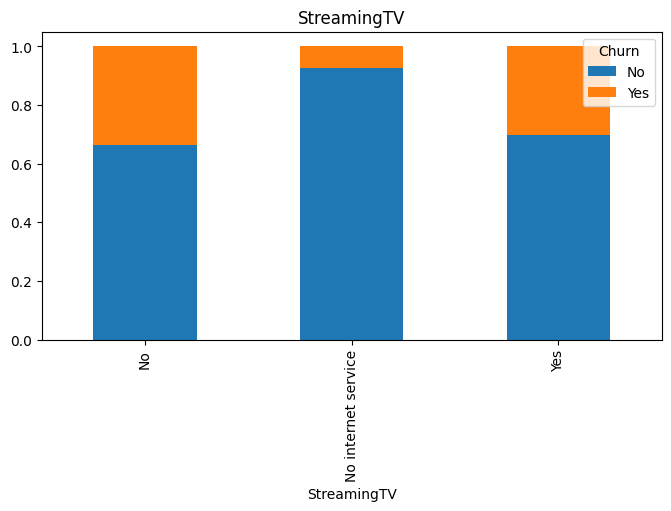

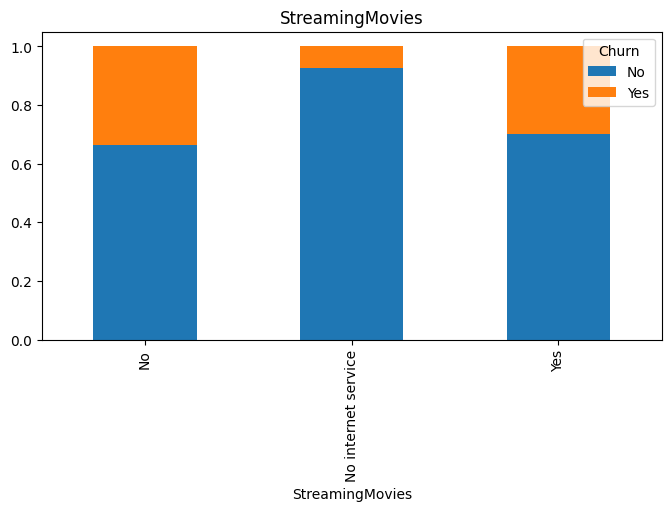

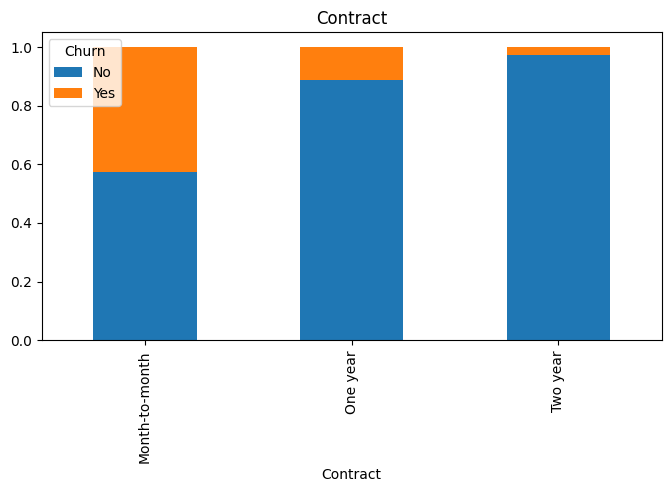

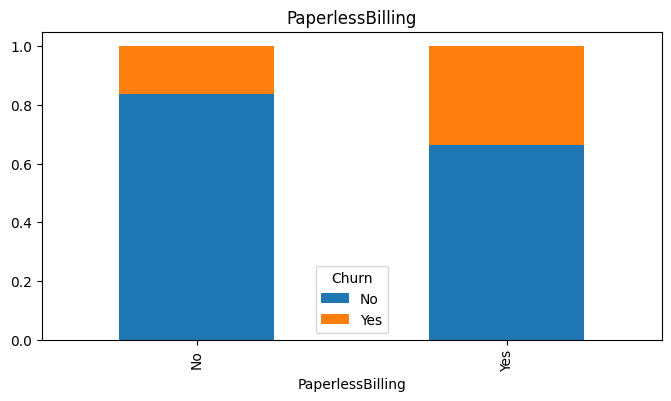

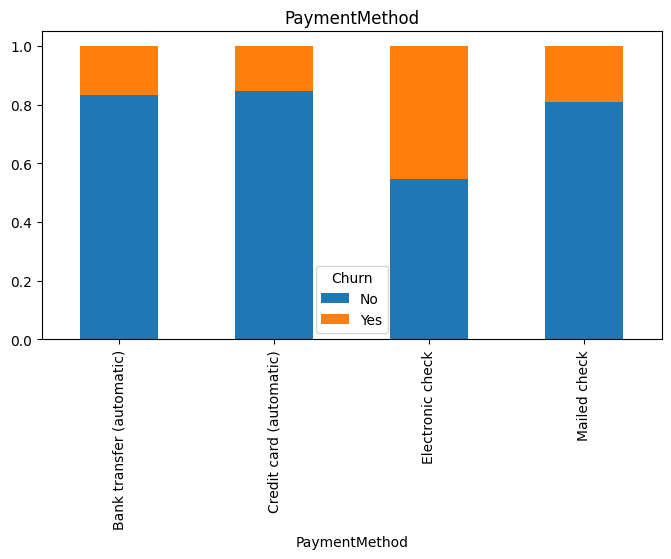

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [31]:

for col in cat_cols:
    churn_rate = churn.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(col)
    plt.show()

Strong churn drivers
* Contract = Month-to-month
* PaymentMethod = Electronic check
* InternetService = Fiber optic

Contract structure and billing method are stronger churn drivers than demographics.

## Feature Engineering

In [32]:
# Mapping the target variable
churn['Churn'] = churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [33]:
churn['SeniorCitizen'] = churn['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [34]:
churn['AverageMonthlyCharges'] = churn['TotalCharges'] / (churn['tenure']+1)

In [35]:
X = churn.drop('Churn', axis=1)
y = churn['Churn']


In [36]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [37]:
X_num = X[num_features]
X_scaled = StandardScaler().fit_transform(X_num)
vif_df = pd.DataFrame(
    {
        'Feature': num_features,
        'VIF': [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    }
).sort_values(by='VIF', ascending=False)

print(vif_df)

                 Feature        VIF
3  AverageMonthlyCharges  20.850916
1         MonthlyCharges  17.778641
2           TotalCharges  10.053097
0                 tenure   5.960907


Some of the feature are highly correlated -> presence of multicollinearity -> regularization required

In [42]:
pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')

Training set size: (5625, 20), Test set size: (1407, 20)


Used stratified in split because of presence of slight imbalance

In [43]:
y_train.shape

(5625,)

In [44]:
ridge_model = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('classifier', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
])

ridge_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

[[919 114]
 [162 212]]
Average Precision: 0.66


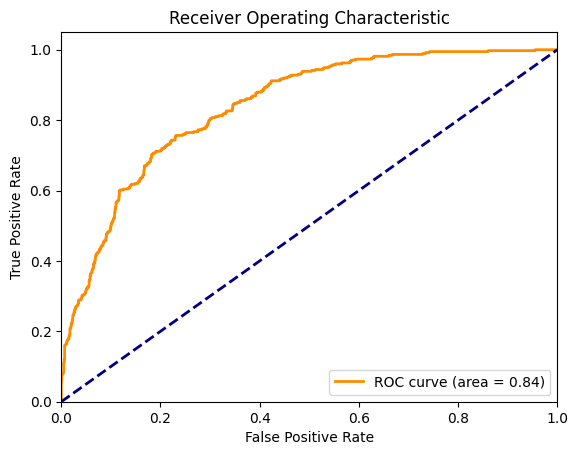

In [50]:
ridge_y_pred = ridge_model.predict(X_test)
print(classification_report(y_test, ridge_y_pred))
print(confusion_matrix(y_test, ridge_y_pred))
ridge_y_prob = ridge_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, ridge_y_prob)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_test, ridge_y_prob)
print(f'Average Precision: {average_precision:.2f}')
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
lasso_logit = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
])

lasso_logit.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407

[[918 115]
 [164 210]]
[       inf 0.94826829 0.83670997 0.83665723 0.81721544 0.81663948
 0.81635861 0.81286609 0.81268115 0.8115579  0.78905885 0.78318824
 0.76439038 0.75735602 0.75518493 0.75145527 0.7495947  0.74766581
 0.73545214 0.73379378 0.73043463 0.72677305 0.72595513 0.7248103
 0.71679635 0.71641418 0.71308633 0.71296739 0.71261824 0.71182029
 0.70387814 0.70279552 0.68701425 0.68582013 0.6821419  0.68067504
 0.68002619 0.67802762 0.67559593 0.67386937 0.66898297 0.66778114
 0.66721554 0.66694749 0.66661794 0.66368306 0.66331811 0.66208639
 0.66130317 0.65768063 0.65379819 0.6528705  0.64962674 0.64612949
 0.64476342 0.64467821 0.64435595 0.64058014 0.6

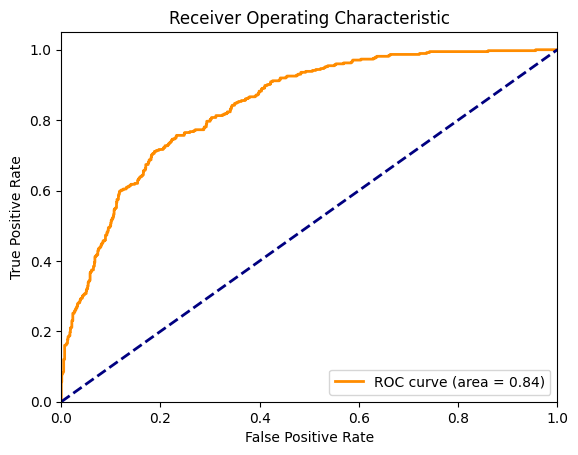

In [53]:
lasso_y_pred = lasso_logit.predict(X_test)
print(classification_report(y_test, lasso_y_pred))
print(confusion_matrix(y_test, lasso_y_pred))
lass_y_pred_prob = lasso_logit.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lass_y_pred_prob)
roc_auc = auc(fpr, tpr)
print(thresholds)
average_precision = average_precision_score(y_test, lass_y_pred_prob)
print(f'Average Precision: {average_precision:.2f}')
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, ridge_y_prob)

threshold_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

threshold_df.head()

,threshold,precision,recall
0,0.002352,0.265814,1.0
1,0.002518,0.266003,1.0
2,0.002531,0.266192,1.0
3,0.002542,0.266382,1.0
4,0.002651,0.266572,1.0


In [56]:
feature_names = ridge_model.named_steps['preprocessor'].get_feature_names_out()
coefficients = ridge_model.named_steps['classifier'].coef_[0]

                               Features  Coefficients
11     cat__InternetService_Fiber optic      1.092620
1                   num__MonthlyCharges      0.607189
2                     num__TotalCharges      0.595798
10               cat__MultipleLines_Yes      0.439103
22                 cat__StreamingTV_Yes      0.399948
24             cat__StreamingMovies_Yes      0.387227
29  cat__PaymentMethod_Electronic check      0.330916
27            cat__PaperlessBilling_Yes      0.284303
5                cat__SeniorCitizen_Yes      0.189919
18            cat__DeviceProtection_Yes      0.109154


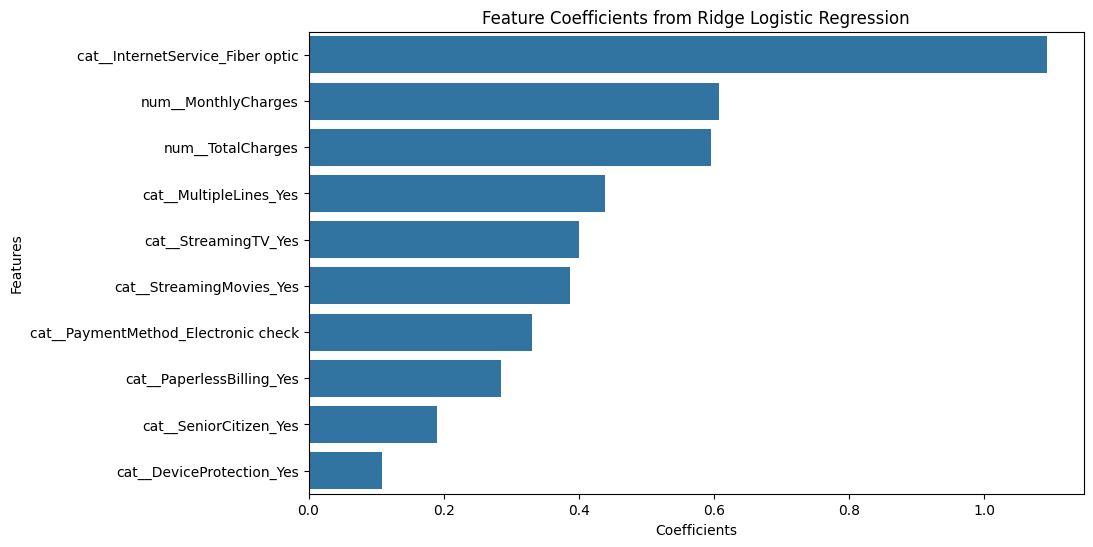

In [58]:
coef_df = pd.DataFrame(
    {
        'Features': feature_names,
        'Coefficients': coefficients
    }
)
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)
top = coef_df.head(10)
print(top)
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficients', y='Features', data=top)
plt.title('Feature Coefficients from Ridge Logistic Regression')
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[927 106]
 [191 183]]


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7128642501776831


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gb = Pipeline(steps=[
    ('preprocessor', pipeline),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7974413646055437
